DEEP LEARNING

LAB-3

PRANSHU PARATE

202211063

**Implement the ANN model on the CIFAR10 dataset.**

In [4]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

ANN

In [5]:
cifar_df = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar_df.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
targets = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
Y_train.shape

(50000, 1)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

In [12]:
#Splitting into train and Validation dataset:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

In [13]:
#Building the Model:
model = tf.keras.Sequential([
    Flatten(input_shape=(3072, )),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') #softmax is used as it is multiclass classification
])

In [14]:
#Compile the Model:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#Fitting the Model:
history = model.fit(X_train, Y_train, epochs=30, batch_size=256, validation_data=(X_val, Y_val))

Epoch 1/30
157/157 [==============================] - 4s 19ms/step - loss: 1.9519 - accuracy: 0.2997 - val_loss: 1.8552 - val_accuracy: 0.3428
Epoch 2/30
157/157 [==============================] - 3s 16ms/step - loss: 1.7687 - accuracy: 0.3731 - val_loss: 1.7216 - val_accuracy: 0.3840
Epoch 3/30
157/157 [==============================] - 4s 24ms/step - loss: 1.6850 - accuracy: 0.4026 - val_loss: 1.6847 - val_accuracy: 0.3934
Epoch 4/30
157/157 [==============================] - 3s 16ms/step - loss: 1.6323 - accuracy: 0.4223 - val_loss: 1.6665 - val_accuracy: 0.4061
Epoch 5/30
157/157 [==============================] - 3s 17ms/step - loss: 1.5759 - accuracy: 0.4419 - val_loss: 1.6004 - val_accuracy: 0.4255
Epoch 6/30
157/157 [==============================] - 3s 16ms/step - loss: 1.5486 - accuracy: 0.4519 - val_loss: 1.6009 - val_accuracy: 0.4332
Epoch 7/30
157/157 [==============================] - 3s 21ms/step - loss: 1.5139 - accuracy: 0.4608 - val_loss: 1.5609 - val_accuracy: 0.4425

In [16]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
def plot_train_val_loss(epochs, loss_values, val_loss_values):
  plt.figure(figsize=(8,6))
  plt.plot(epochs, loss_values, 'blue', label="Training loss")
  plt.plot(epochs, val_loss_values, 'red', label="Validation loss")
  plt.title("Graph for Training and Validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

def plot_train_val_acc(epochs, acc_values, val_acc_values):
  plt.figure(figsize=(8,6))
  plt.plot(epochs, acc_values, 'blue', label="Training accuracy")
  plt.plot(epochs, val_acc_values, 'green', label="Validation accuracy")
  plt.title("Graph for Training and Validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

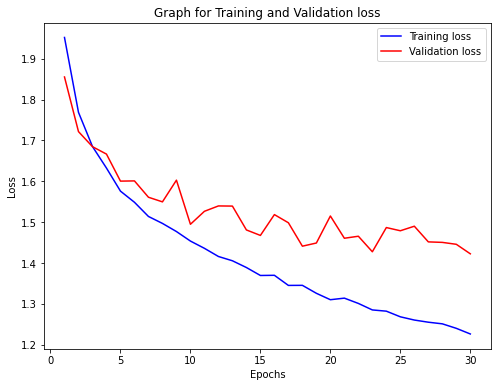

In [19]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plot_train_val_loss(epochs, loss, val_loss)

In [20]:
test_loss, test_acc =  model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3985 - accuracy: 0.5045


In [21]:
print("Test accuracy:", test_acc*100)

Test accuracy: 50.44999718666077


CNN

In [ ]:
#load the datset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#displaying the shape of train and test dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Data Visualization

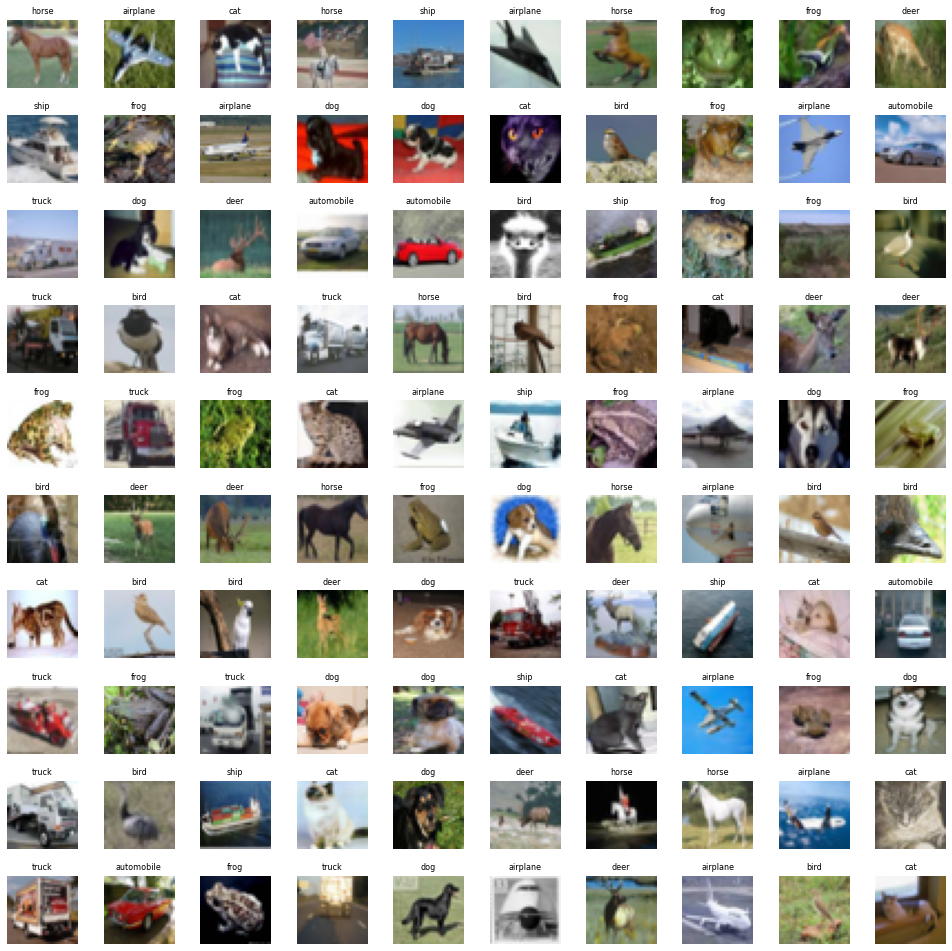

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

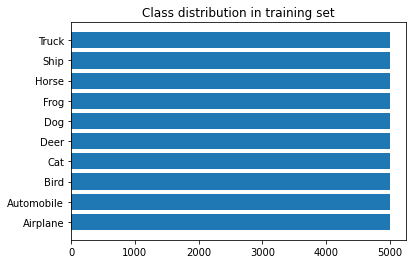

In [ ]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

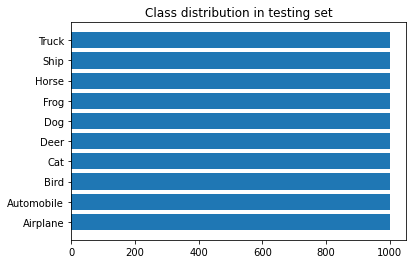

In [ ]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

Data Preprocessing

In [ ]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
#Building the Model
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
#Fitting the Model
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Model Evaluation

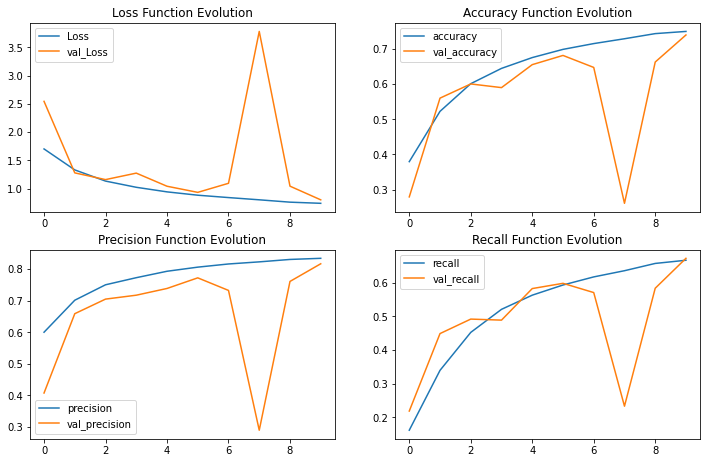

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 [==============================] - 23s 70ms/step - loss: 2.3030 - accuracy: 0.1016 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Accuracy : 10.16%
313/313 [==============================] - 22s 70ms/step


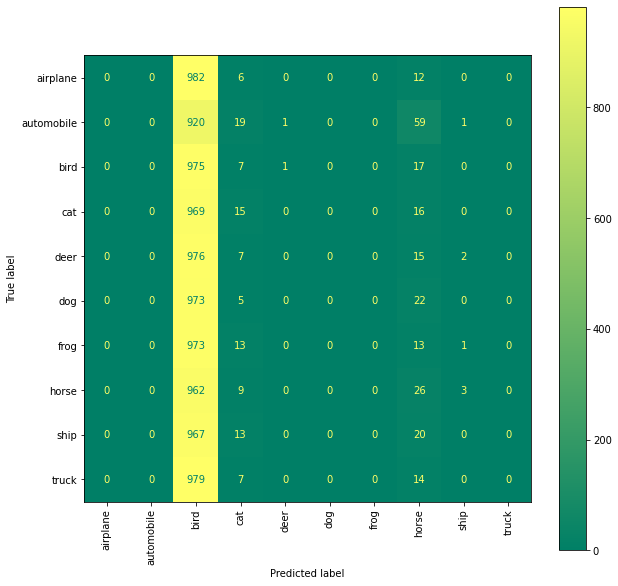

In [ ]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      0.97      0.18      1000
           3       0.15      0.01      0.03      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.12      0.03      0.04      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.04      0.10      0.03     10000
weighted avg       0.04      0.10      0.03     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Image 20 is [7]
1/1 [==============================] - 0s 27ms/step
The model predict that image 200 is 2


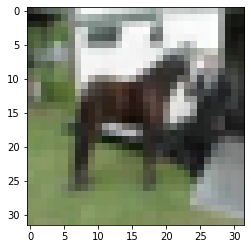

In [ ]:
my_image = X_test[20]
plt.imshow(my_image)

# that's a Horse
print(f" Image 20 is {y_test[20]}")

## correctly predicted as a Horse
pred_20 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 200 is {pred_20}")

**Apply binary classification on churn modeling dataset.**

In [ ]:
#import the packages
import numpy as np
import pandas as pd

In [ ]:
#load the dataset
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Data Preprocessing

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Data Visualization

,index,Exited
0,0,0.7963
1,1,0.2037


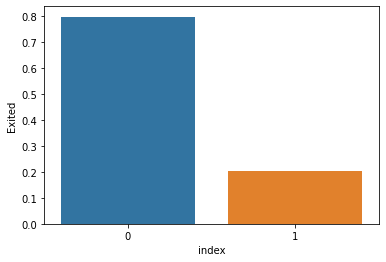

In [ ]:
#target distribution
import seaborn as sns
density = df['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

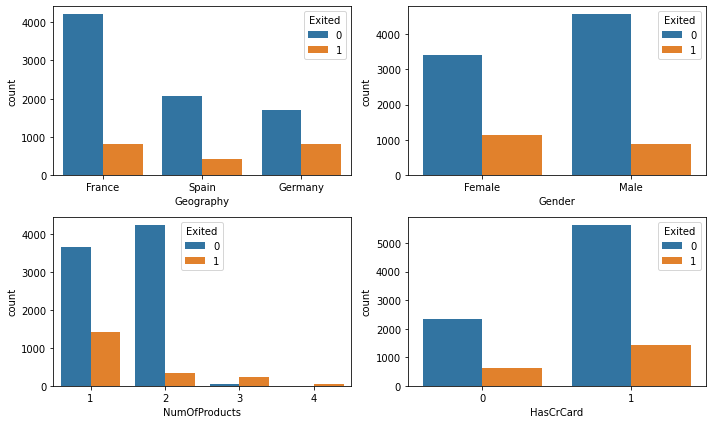

In [ ]:
import matplotlib.pyplot as plt
categorical = df.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

# create sub-plots anf title them
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

In [ ]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


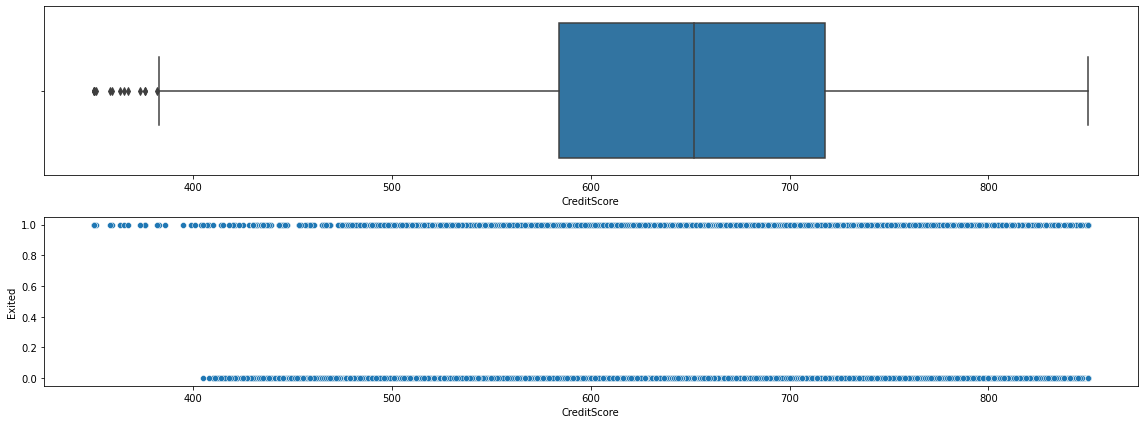

In [ ]:
box_scatter(df,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


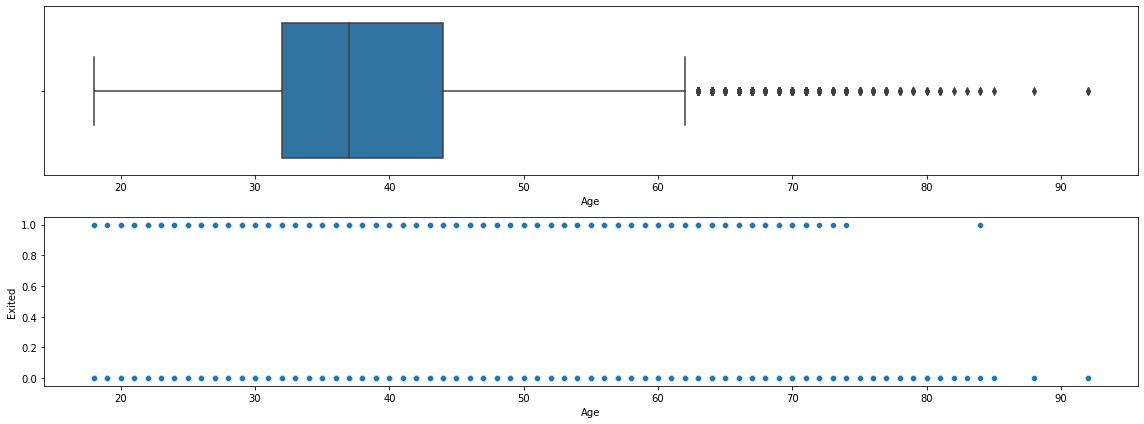

In [ ]:
box_scatter(df,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 87])}")

# of Bivariate Outliers: 4


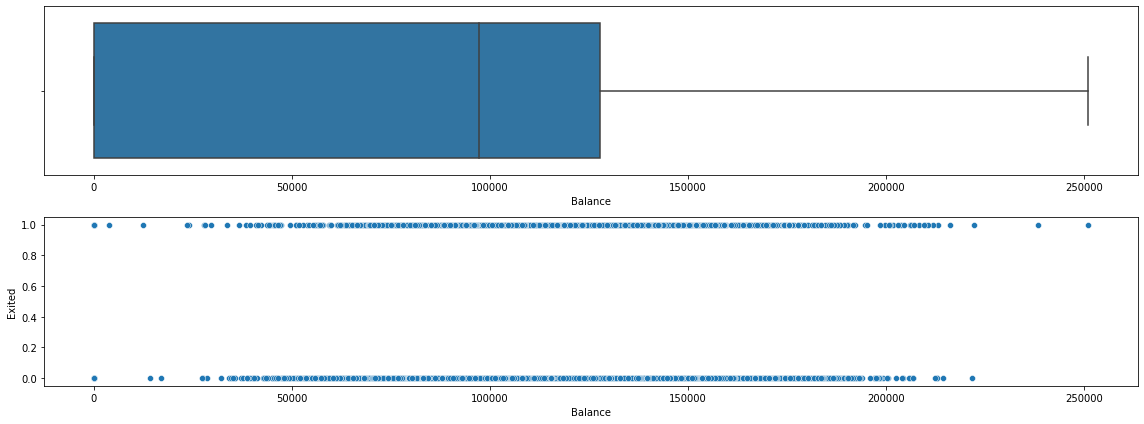

In [ ]:
box_scatter(df,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Balance'] > 220000])}")

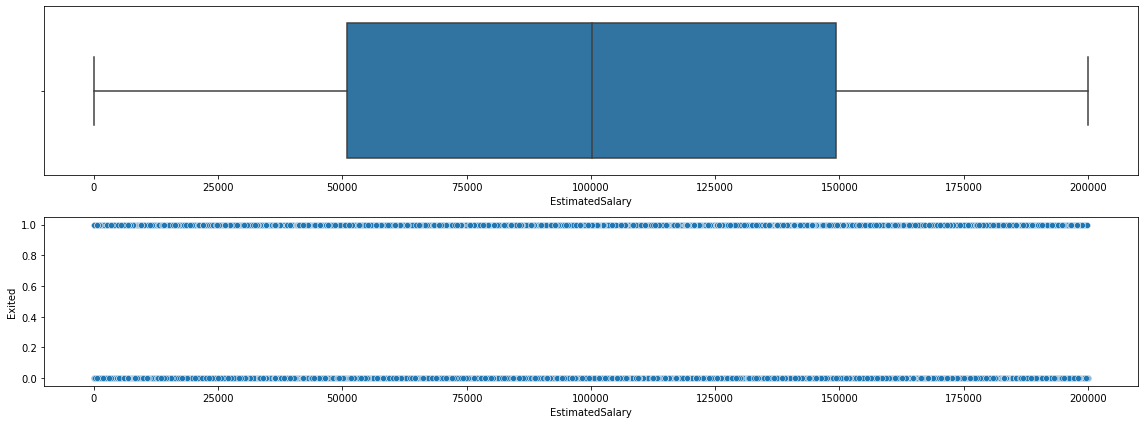

In [ ]:
box_scatter(df,'EstimatedSalary','Exited');
plt.tight_layout()

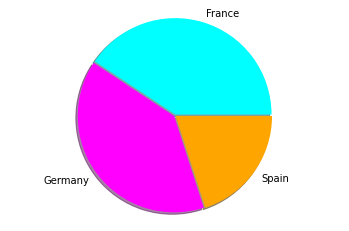

In [ ]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

In [ ]:
#define input features and the target variable.
X= df.iloc[:,3:-1]
y=df.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
# Dropping 
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#splitting of train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#scale the dataset
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
#building the ANN model
classifier= Sequential()
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 72        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fitting the model
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 8s 9ms/step - loss: 0.6424 - accuracy: 0.7186 - val_loss: 0.5085 - val_accuracy: 0.7887
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4888 - accuracy: 0.7990 - val_loss: 0.4650 - val_accuracy: 0.8114
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4546 - accuracy: 0.8102 - val_loss: 0.4433 - val_accuracy: 0.8152
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4351 - accuracy: 0.8141 - val_loss: 0.4320 - val_accuracy: 0.8186
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4244 - accuracy: 0.8214 - val_loss: 0.4261 - val_accuracy: 0.8205
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4183 - accuracy: 0.8233 - val_loss: 0.4216 - val_accuracy: 0.8243
Epoch 7/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4138 - accuracy: 0.8250 - val_loss: 0.4185 - val_accuracy: 0.8258

[]

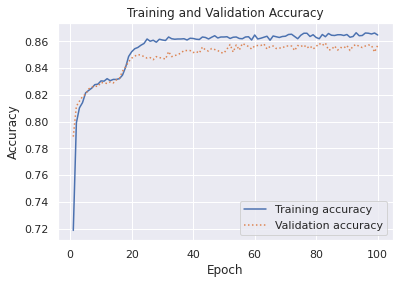

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = model_history.history['accuracy']
val = model_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


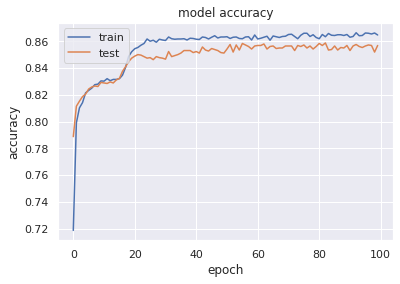

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Performing prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1501,   94],
       [ 196,  209]])

In [ ]:
#Calculating accuracy of model
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

85.5


**Apply multiple linear regression on the house price prediction dataset.**

In [ ]:
#import the packages
import numpy as np
import pandas as pd 

In [ ]:
#load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
#import the packages
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as skpp
import scipy.stats as stats
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from keras.models import Sequential
from keras.layers import BatchNormalization 
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint #we can control our model if going well during validation part or not
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
import tensorflow as tf

Data Visulization

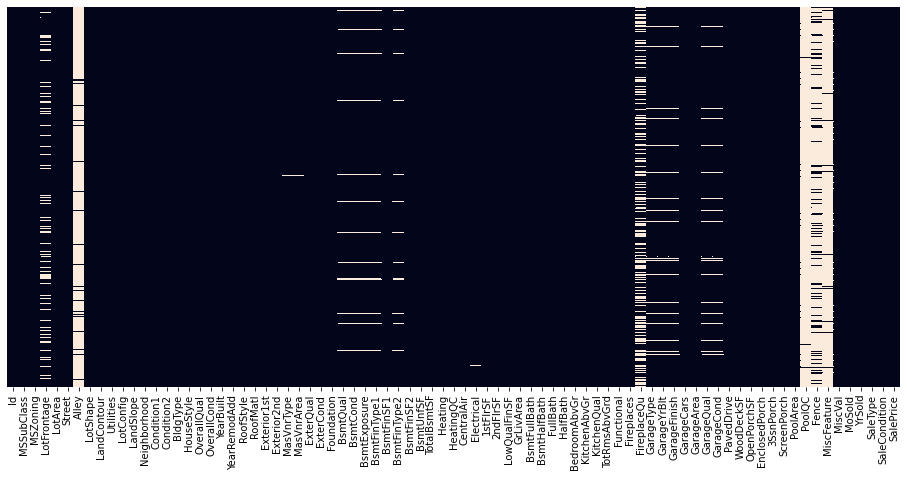

In [ ]:
plt.figure(figsize = (16,7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

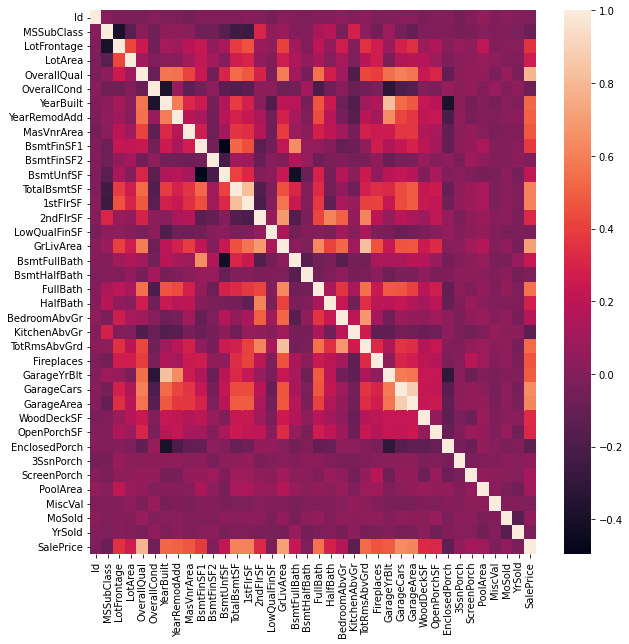

In [ ]:
#Find columns with high correlation to the outcome 'Sale Price'.
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr())

Total Data in Test Set: 1459

Missing Values in Test Set:

MSZoning:4
LotFrontage:227
Alley:1352
Utilities:2
Exterior1st:1
Exterior2nd:1
MasVnrType:16
MasVnrArea:15
BsmtQual:44
BsmtCond:45
BsmtExposure:44
BsmtFinType1:42
BsmtFinSF1:1
BsmtFinType2:42
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
KitchenQual:1
Functional:2
FireplaceQu:730
GarageType:76
GarageYrBlt:78
GarageFinish:78
GarageCars:1
GarageArea:1
GarageQual:78
GarageCond:78
PoolQC:1456
Fence:1169
MiscFeature:1408
SaleType:1


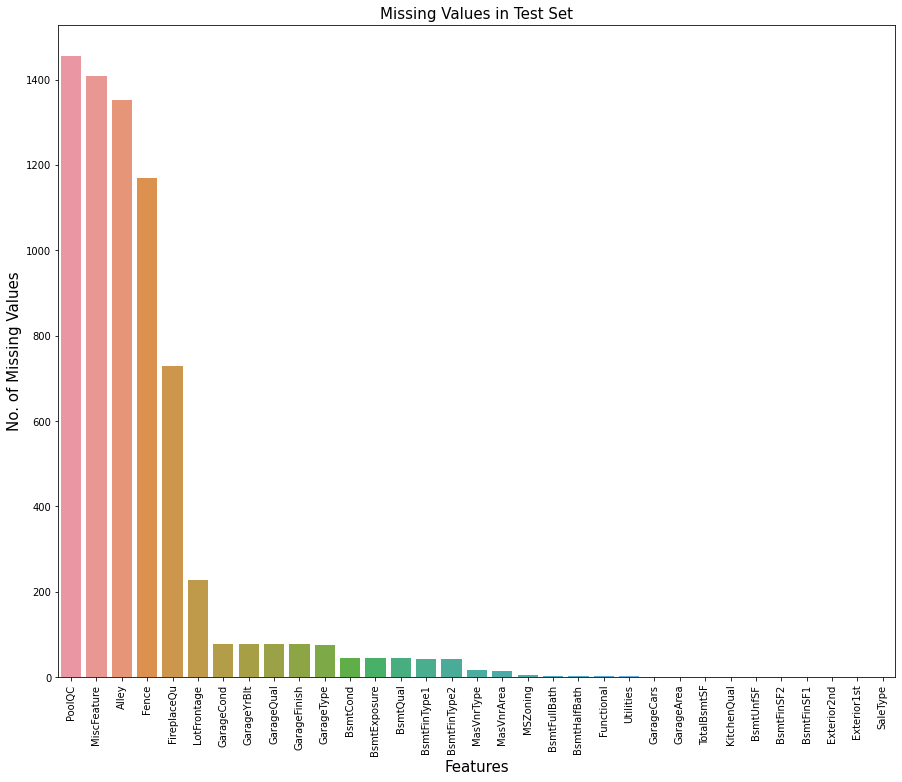

In [ ]:
#Dropping the features BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, FireplaceQu, GarageCond -- with "None"
print('Total Data in Test Set:', len(test_data))
print('\nMissing Values in Test Set:\n')
Headings = list(test_data)
MSx = []
MSy = []
for name in Headings:
    if (test_data[name].isnull().sum() > 0):
        print('%s:%d' % (name,test_data[name].isnull().sum()))
        MSx = MSx + [name]
        MSy = MSy + [test_data[name].isnull().sum()]

df = pd.DataFrame(data={'MSx':MSx, 'MSy':MSy})
df = df.sort_values(by=['MSy'], ascending=False)
plt.figure(2, figsize=(15,12))
sns.barplot(x=df.MSx, y=df.MSy)
plt.xticks(rotation='90')
plt.title('Missing Values in Test Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

In [ ]:
NoneCols = ['MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass', 'Alley']

for name in NoneCols:
    train_data[name] = train_data[name].fillna('None')
    test_data[name] = test_data[name].fillna('None')

OCols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
         'BsmtHalfBath', 'MasVnrArea', 'MasVnrArea']

for name in OCols:
    train_data[name] = train_data[name].fillna(0)
    test_data[name] = test_data[name].fillna(0)   
    
MCols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']

for name in MCols:
    train_data[name] = train_data[name].fillna(train_data[name].mode()[0])
    test_data[name] = test_data[name].fillna(test_data[name].mode()[0])

train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['LotFrontage'] = test_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
test_data['Functional'] = test_data['Functional'].fillna('Typ')

train_data = train_data.drop('Utilities', axis=1)
test_data = test_data.drop('Utilities', axis=1)

if(train_data.isnull().sum().sum() == 0 and test_data.isnull().sum().sum() == 0):
    print('\nNo Missing Values found')
else:
    train_data.isnull().sum()
    print('\nMissing Values are still present')


No Missing Values found


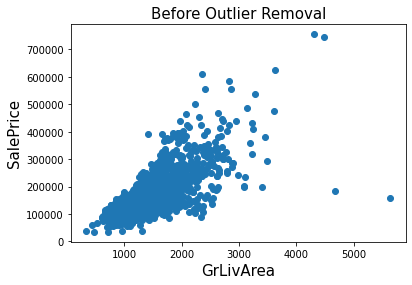

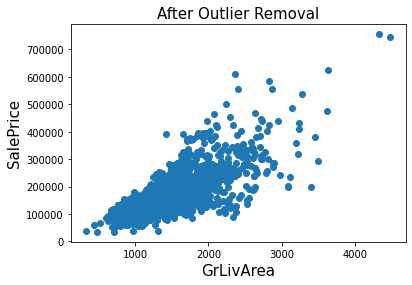

In [ ]:
def outlier_detection(train_data):
    # Outlier Detection
    plt.figure(9)
    plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
    plt.title('Before Outlier Removal', fontsize=15)
    plt.xlabel('GrLivArea', fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)
    plt.show()
    plt.savefig('Before_Outlier_Removal.png')
    plt.close()
    
    # Outlier Removal
    train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)
    train_data = train_data.reset_index()
    train_data = train_data.drop('index', axis=1)

    # Cleaned Data
    plt.figure(10)
    plt.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
    plt.title('After Outlier Removal', fontsize=15)
    plt.xlabel('GrLivArea', fontsize=15)
    plt.ylabel('SalePrice', fontsize=15)

    plt.savefig('After_Outlier_Removal.png')
    plt.show()
    plt.close()
outlier_detection(train_data)


mu(Mean): 12.024
sigma(Standard Deviation): 0.399
Mode: 11


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


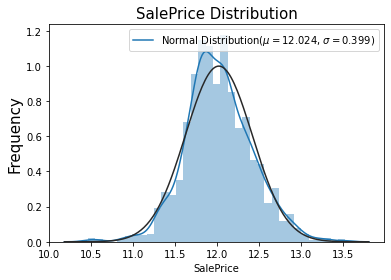

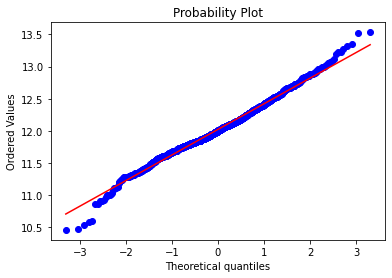

Skewness: 0.12135
Kurtosis: 0.80952

Z-Score: 0       0.560067
1       0.212763
2       0.734046
3      -0.437383
4       1.014651
          ...   
1455    0.121433
1456    0.578019
1457    1.174709
1458   -0.399657
1459   -0.306695
Name: SalePrice, Length: 1460, dtype: float64


In [ ]:
Y_train = train_data['SalePrice']
Id_final = test_data['Id']
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

# New Distribution
# Mean, Standard Deviation and Mode
(mu, sigma) = stats.norm.fit(train_data['SalePrice'])
mu = round(mu,3)
sigma = round(sigma,3)
mode = int(train_data['SalePrice'].mode())
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)
print('Mode:', mode)

# Skewness of Target Variable
plt.figure(11)
sns.distplot(train_data['SalePrice'] , fit=stats.norm)
plt.title('SalePrice Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)], loc='best')
plt.show()

# Probability Plot(Similar to Quantile-Quantile Plot)
plt.figure(12)
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

# Skewness and Kurtosis
print('Skewness: %.5f' % train_data['SalePrice'].skew())
print('Kurtosis: %.5f' % train_data['SalePrice'].kurt())

# Z-Score
Zscore = stats.zscore(train_data['SalePrice'])
print('\nZ-Score:', Zscore)

In [ ]:
Train_fe = train_data.copy()
Test_fe = test_data.copy()

print('\nMost important features relative to Target:\n')
CMtx = Train_fe.corr()
CMtx.sort_values(['SalePrice'], ascending = False, inplace = True)
print(CMtx['SalePrice'][abs(CMtx['SalePrice']) >= 0.1])

Train_fe['HsAge'] = Train_fe['YrSold'] - Train_fe['YearBuilt']
Test_fe['HsAge'] = Test_fe['YrSold'] - Test_fe['YearBuilt']
Train_fe['TotalSF'] = Train_fe['TotalBsmtSF'] + Train_fe['1stFlrSF'] + Train_fe['2ndFlrSF']
Test_fe['TotalSF'] = Test_fe['TotalBsmtSF'] + Test_fe['1stFlrSF'] + Test_fe['2ndFlrSF']

Train_fe['MSSubClass'] = Train_fe['MSSubClass'].apply(str)
Test_fe['MSSubClass'] = Test_fe['MSSubClass'].apply(str)
Train_fe['OverallCond'] = Train_fe['OverallCond'].astype(str)
Test_fe['OverallCond'] = Test_fe['OverallCond'].astype(str)
Train_fe['MoSold'] = Train_fe['MoSold'].astype(str)   
Test_fe['MoSold'] = Test_fe['MoSold'].astype(str)

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Train_fe[c].values)) 
    Train_fe[c] = lbl.transform(list(Train_fe[c].values))
    
    lbl.fit(list(Test_fe[c].values)) 
    Test_fe[c] = lbl.transform(list(Test_fe[c].values))



"""
    for column in OrdCols:
     Train
    lbl = skpp.LabelEncoder() 
    lbl.fit(list(Train_fe[column].values))
    Train_fe[column] = lbl.transform(list(train_data[column].values))
    #encoder=LabelEncoder()
    #Train_fe= train_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')
  
    # Test
    #lbl = skpp.LabelEncoder() 
    #lbl.fit(list(Test_fe[column].values))
    #Test_fe[column] = lbl.transform(list(Test_fe[column].values))
    #encoder=LabelEncoder()
    #Test_fe= test_data.apply(lambda col: encoder.fit_transform(col.astype(str)), axis=0, result_type='expand')
"""  
    
NumF = Train_fe.dtypes[Train_fe.dtypes != 'object'].index
NumF = NumF.drop('SalePrice')

SkewedFtrn = Train_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Train): \n")
df = pd.DataFrame({'Skewness' : SkewedFtrn})
print(df.head(15))

SkewedFtst = Test_fe[NumF].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Numerical Features(Test): \n")
df = pd.DataFrame({'Skewness' : SkewedFtst})
print(df.head(15))

Tolerance = 0.2 
BoxF = list(SkewedFtrn[abs(SkewedFtrn) > Tolerance].index) + list(SkewedFtst[abs(SkewedFtst) > Tolerance].index)
BoxF = list(set(BoxF))
Lam = 0.15  
for name in BoxF:
    Train_fe[name] = boxcox1p(Train_fe[name], Lam)
    Test_fe[name] = boxcox1p(Test_fe[name], Lam)

DF = list(CMtx.index[abs(CMtx['SalePrice']) < 0.02])
Train_fe.drop(DF, axis=1, inplace=True)
Test_fe.drop(DF, axis=1, inplace=True)

#Features that have a very low Correlation with the Target Variable were dropped.


Most important features relative to Target:

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.426776
BsmtFinSF1       0.372023
LotFrontage      0.353288
GarageYrBlt      0.349013
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

Skewness in Numerical Features(Train): 

                Skewness
MiscVal        24.476794
PoolArea       14.828374
Condition2     13.171844
LotArea        12.207688
3SsnPorch      10.304342
Heating         9.855100
Low

In [ ]:
Train_fey = Train_fe['SalePrice']
Train_fe = Train_fe.drop('SalePrice', axis=1)
dataFE = pd.concat((Train_fe, Test_fe)).reset_index(drop=True)

# Column Treatment(One Hot Encoding of Categorical Data)
dataFE = pd.get_dummies(dataFE)
print('\nShape of Data:')
print(dataFE.shape)

#train_set_size = int(.67 * len(X_train))
# Data Separation

X_train = dataFE[:1460]
X_test = dataFE[1460:]
X_test = X_test.reset_index().drop('index', axis=1)


Shape of Data:
(2919, 78)


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   float64
 5   Alley          1459 non-null   float64
 6   LotShape       1459 non-null   float64
 7   LandContour    1459 non-null   float64
 8   LotConfig      1459 non-null   float64
 9   LandSlope      1459 non-null   float64
 10  Neighborhood   1459 non-null   int64  
 11  Condition1     1459 non-null   float64
 12  Condition2     1459 non-null   float64
 13  BldgType       1459 non-null   float64
 14  HouseStyle     1459 non-null   float64
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

In [ ]:
#building the model
model = Sequential()
model.add(Dense(units=256, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=8, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_logarithmic_error',
               optimizer='adam') 

history_model = model.fit(X_train, Train_fey, validation_split=0.2, epochs=1000, batch_size=64, verbose=0)
predict = model.predict(X_test, batch_size=64) 

pred = np.exp(predict).flatten()
pred = pd.DataFrame({'Id':Id_final, 'SalePrice':pred})
pred['SalePrice'] = pred['SalePrice'].transform(lambda x: (x-1))

pred.to_csv('submission.csv', index=False)

23/23 [==============================] - 0s 2ms/step


In [ ]:
sub = pd.read_csv('/content/submission.csv')
sub.head()

,Id,SalePrice
0,1461,124904.578125
1,1462,187215.015625
2,1463,189639.500000
3,1464,210772.468750
4,1465,196944.328125


**Analyze the performance of heart rate classification using ANN and regression models.** 


In [ ]:
#import the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [ ]:
#load the dataset
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Preprocessing

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [ ]:
data.shape

(303, 14)

In [ ]:
#define input features and the target variable.
X = data.iloc[:,:13].values
y = data["target"].values

In [ ]:
#splitting of train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0 )

In [ ]:
#scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ANN MODEL

In [ ]:
#building the ANN model with binary classifier
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 112       
                                                                 
 dense_13 (Dense)            (None, 14)                126       
                                                                 
 dense_14 (Dense)            (None, 1)                 15        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
hist = classifier.fit(X_train , y_train ,validation_data=(X_test, y_test), batch_size = 8 ,epochs = 50 )

Epoch 1/50
27/27 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5660 - val_loss: 0.6923 - val_accuracy: 0.5165
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5566 - val_loss: 0.6873 - val_accuracy: 0.5165
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5566 - val_loss: 0.6667 - val_accuracy: 0.5165
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.5566 - val_loss: 0.6269 - val_accuracy: 0.5165
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5796 - accuracy: 0.6179 - val_loss: 0.5823 - val_accuracy: 0.7802
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.8066 - val_loss: 0.5536 - val_accuracy: 0.7692
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.8443 - val_loss: 0.5366 - val_accuracy: 0.7912
Epoch 8/50
27/27 [=

[]

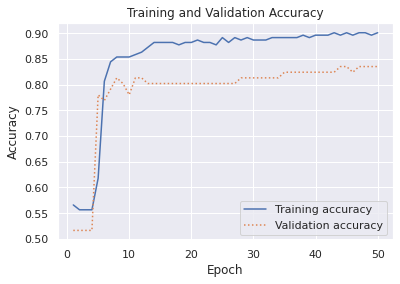

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


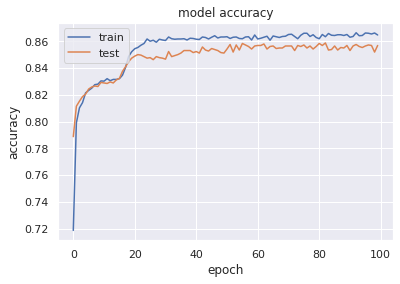

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Performing prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 7ms/step


In [ ]:
y_pred

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[34, 10],
       [ 5, 42]])

In [ ]:
#Calculating accuracy of model
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

83.51648351648352


LOGISTIC REGRESSION

In [ ]:
#Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.shape 

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Split dataset into independent and dependent variables
X = df.drop("target", axis=1)
y = df["target"]

In [ ]:
#Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8852459016393442

The accuracy of heart rate classification using ANN and logistic regression are 83% and 88% respectively. So, the logistic regression model predict between chance of heart attack or not more accurately than ANN model.
